In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('new_data.csv')

In [3]:
data.columns

Index(['GEOLEVEL', 'GEOID', 'GEONAME', 'MARKET', 'YEAR', 'TOT_ORIG',
       'AVE_LOANAMT', 'AVE_PROPVAL', 'AVE_INTRATE', 'PCT_INTRATE_LT_3',
       'PCT_INTRATE_3_4', 'PCT_INTRATE_4_5', 'PCT_INTRATE_5_6',
       'PCT_INTRATE_GE_6', 'PCT_OWNOCC', 'AVE_TERM', 'PCT_ARM',
       'PCT_TERM_FRM_15', 'PCT_TERM_FRM_30', 'AVE_DTI', 'PCT_DTI_LE36',
       'PCT_DTI_3743', 'PCT_DTI_GE44', 'AVE_VANTAGESCR', 'PCT_VS_VERYPOOR',
       'PCT_VS_POOR', 'PCT_VS_FAIR', 'PCT_VS_GOOD', 'PCT_VS_EXCELLENT',
       'AVE_LTV', 'AVE_CLTV', 'PCT_LTV_LE70', 'PCT_LTV_7080', 'PCT_LTV_8090',
       'PCT_LTV_9095', 'PCT_LTV_9597', 'PCT_LTV_GT97', 'PCT_GOVERNMENT',
       'PCT_ENTERPRISE', 'PCT_OTHERCONFORMING', 'PCT_NONCONFORMING', 'PCT_WHT',
       'PCT_BLK', 'PCT_ASN', 'PCT_HPI', 'PCT_AMI', 'PCT_MIX', 'PCT_HIS',
       'PCT_HSP', 'PCT_WNH', 'PCT_MNH', 'AVE_AGE_BORROWER', 'PCT_AGE_LT25',
       'PCT_AGE_2534', 'PCT_AGE_3544', 'PCT_AGE_4554', 'PCT_AGE_5564',
       'PCT_AGE_GE65', 'PCT_MALEBOR', 'PCT_FEMALEBOR', 'PCT_

In [4]:
data['GEOLEVEL'].unique()

array(['National', 'Census Region', 'Census Division', 'State'],
      dtype=object)

In [5]:
state_data = data[data['GEOLEVEL'] == 'State']

In [6]:
state_data 

,GEOLEVEL,GEOID,GEONAME,MARKET,YEAR,TOT_ORIG,AVE_LOANAMT,AVE_PROPVAL,AVE_INTRATE,PCT_INTRATE_LT_3,...,PCT_AGE_5564,PCT_AGE_GE65,PCT_MALEBOR,PCT_FEMALEBOR,PCT_TWOBOR,PCT_MULTIBOR,UNEMPLOYMENT_RATE,ANNUAL_CHANGE_UNEMPLOYMENT_RATE,GDP ( Billions of US $),ANNUAL_CHANGE_GDP
336,State,AK,Alaska,All Mortgages,1998,26.0,120.0,154.0,6.9,0.0,...,7.3,2.6,22.5,14.7,62.5,0.4,4.51,-0.49,9062.818202,4.4814
337,State,AK,Alaska,All Mortgages,1999,19.0,125.0,161.0,7.2,0.0,...,10.6,2.2,21.8,16.9,60.7,0.6,4.22,-0.29,9631.174489,4.7945
338,State,AK,Alaska,All Mortgages,2000,13.0,127.0,161.0,8.0,0.0,...,9.7,3.2,26.5,18.5,54.2,0.8,3.99,-0.23,10250.947997,4.0772
339,State,AK,Alaska,All Mortgages,2001,23.0,137.0,181.0,6.9,0.0,...,9.8,3.1,22.3,16.1,61.1,0.4,4.73,0.74,10581.929774,0.9543
340,State,AK,Alaska,All Mortgages,2002,29.0,152.0,204.0,6.3,0.0,...,11.1,2.9,22.5,14.6,62.7,0.2,5.78,1.05,10929.112955,1.6959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37440,State,WY,Wyoming,Jumbo Market (Refinance),2017,0.0,936.0,1684.0,4.2,0.0,...,0.0,20.0,60.0,0.0,40.0,0.0,4.36,-0.51,19477.336549,2.2419
37441,State,WY,Wyoming,Jumbo Market (Refinance),2018,0.0,1566.0,2956.0,4.1,0.0,...,20.0,0.0,20.0,20.0,60.0,0.0,3.90,-0.46,20533.057312,2.9454
37442,State,WY,Wyoming,Jumbo Market (Refinance),2019,0.0,2094.0,4472.0,3.5,40.0,...,40.0,0.0,20.0,0.0,80.0,0.0,3.67,-0.23,21380.976119,2.2944
37443,State,WY,Wyoming,Jumbo Market (Refinance),2020,0.0,3041.0,2946.0,3.0,40.0,...,20.0,20.0,60.0,0.0,40.0,0.0,8.05,4.38,21060.473613,-2.7678


In [11]:
state_wise_data = {}
for id in state_data['GEOID'].unique():
    state_wise_data[id] = state_data[state_data['GEOID'] == id]

### ANOVA TEST

#### TOT_ORIG

In [18]:
# perform anova test between each state for TOT_ORIG

# Perform ANOVA test
temp  = list(state_wise_data.values())
temp = [x['TOT_ORIG'] for x in temp]
result = stats.f_oneway(*temp)

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)


ANOVA Test Result:
F-statistic: 342.48728611459245
p-value: 0.0


In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(state_data['TOT_ORIG'], state_data['GEOID'])
result = mc.tukeyhsd()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [43]:
reject = np.where(result.reject == False)[0]
print("Number of not rejects:", len(reject))
print("Number of rejects:", len(result.reject) - len(reject))

Number of not rejects: 400
Number of rejects: 875


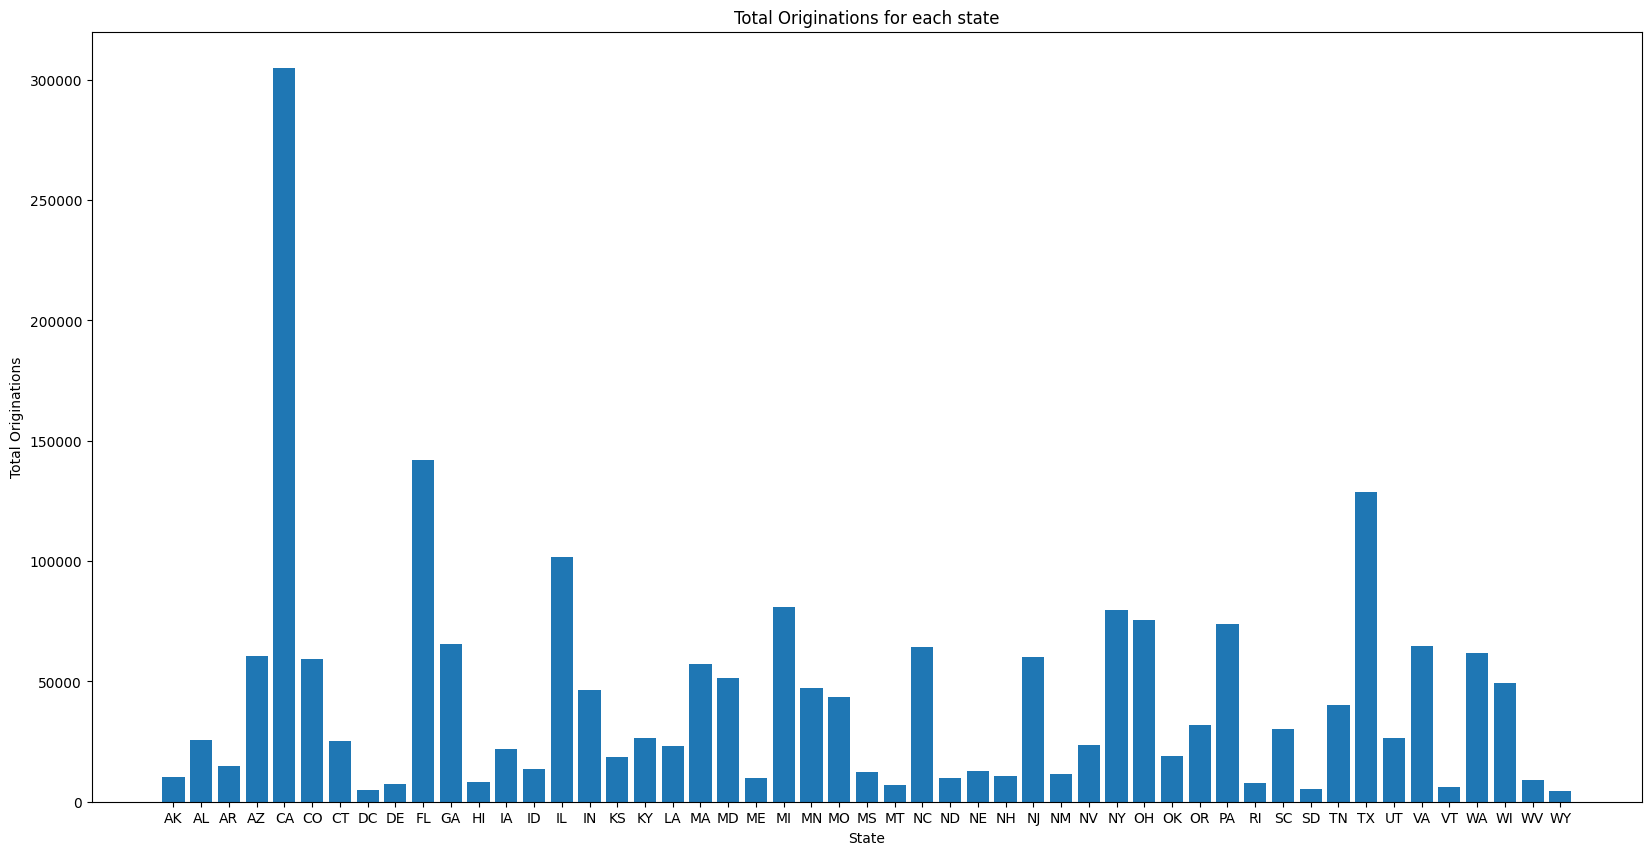

In [25]:
#plot of TOT_ORIG for each state
plt.figure(figsize=(20,10))
plt.title('Total Originatiaons for each state')
plt.xlabel('State')
plt.ylabel('Total Originations')
plt.bar(state_data['GEOID'].unique(), state_data.groupby('GEOID')['TOT_ORIG'].sum())
plt.show()

#### AVE_LOANANT

In [26]:
temp  = list(state_wise_data.values())
temp = [x['AVE_LOANAMT'] for x in temp]
result = stats.f_oneway(*temp)

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-statistic: 35.70318260463009
p-value: 0.0


In [30]:
# post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(state_data['AVE_LOANAMT'], state_data['GEOID'])
result = mc.tukeyhsd()

In [41]:
# count number of rejecs = false
reject = np.where(result.reject == False)[0]
print("Number of not rejects:", len(reject))
print("Number of rejects:", len(result.reject) - len(reject))

Number of not rejects: 724
Number of rejects: 551


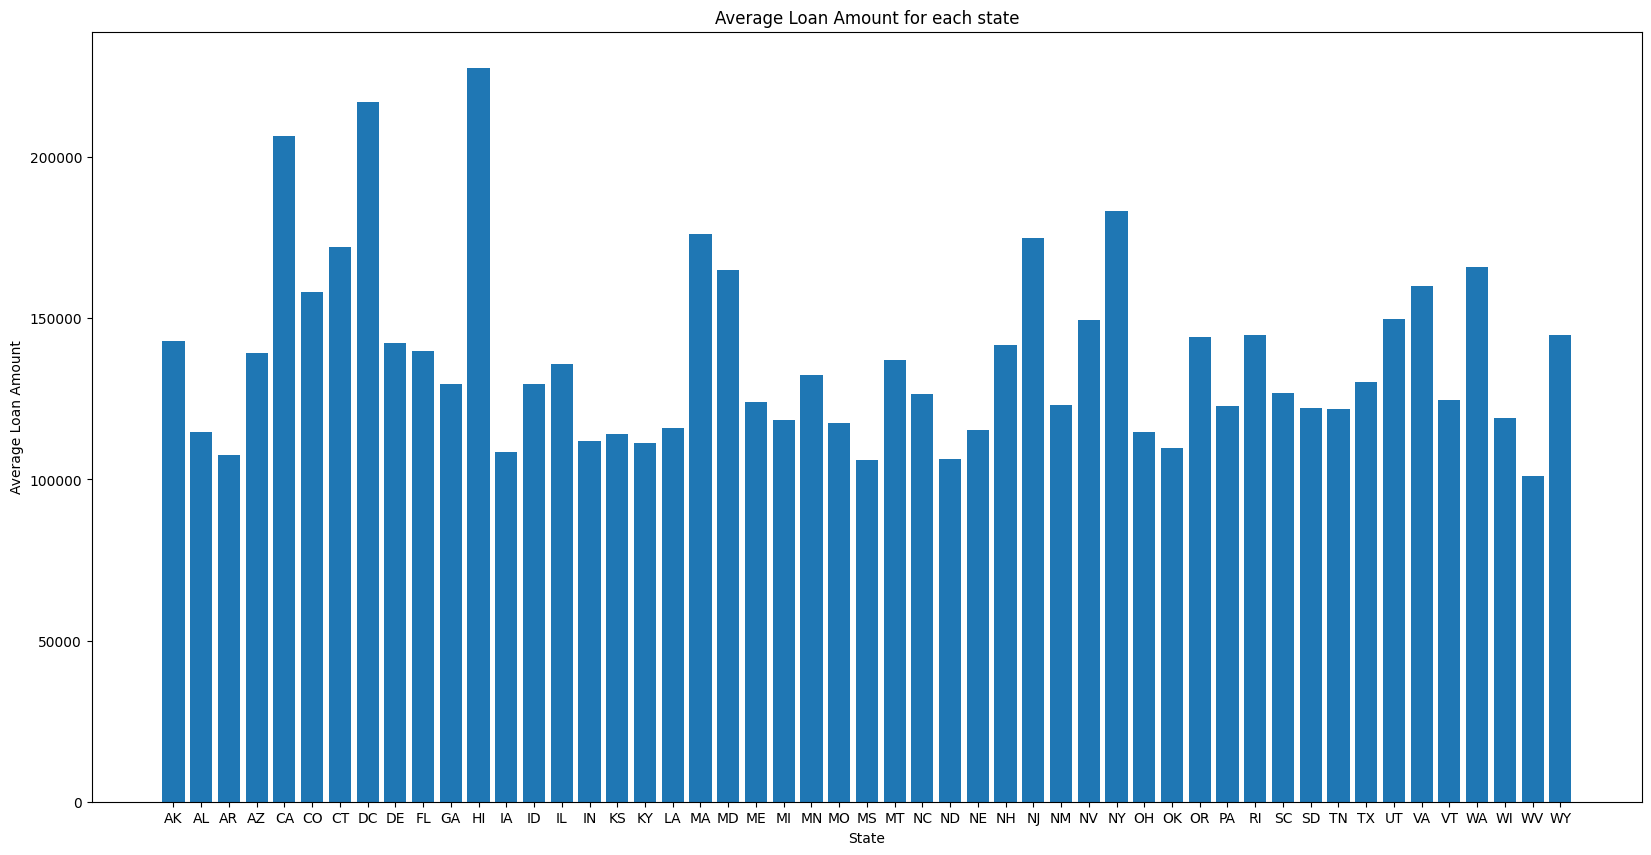

In [27]:
# plot of AVE_LOANAMT for each state
plt.figure(figsize=(20,10))
plt.title('Average Loan Amount for each state')
plt.xlabel('State')
plt.ylabel('Average Loan Amount')
plt.bar(state_data['GEOID'].unique(), state_data.groupby('GEOID')['AVE_LOANAMT'].sum()) 
plt.show()

#### AVE_INTRATE

In [45]:
temp  = list(state_wise_data.values())
temp = [x['AVE_INTRATE'] for x in temp]
result = stats.f_oneway(*temp)

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Test Result:
F-statistic: 1.873370854377587
p-value: 0.00018365483723495088


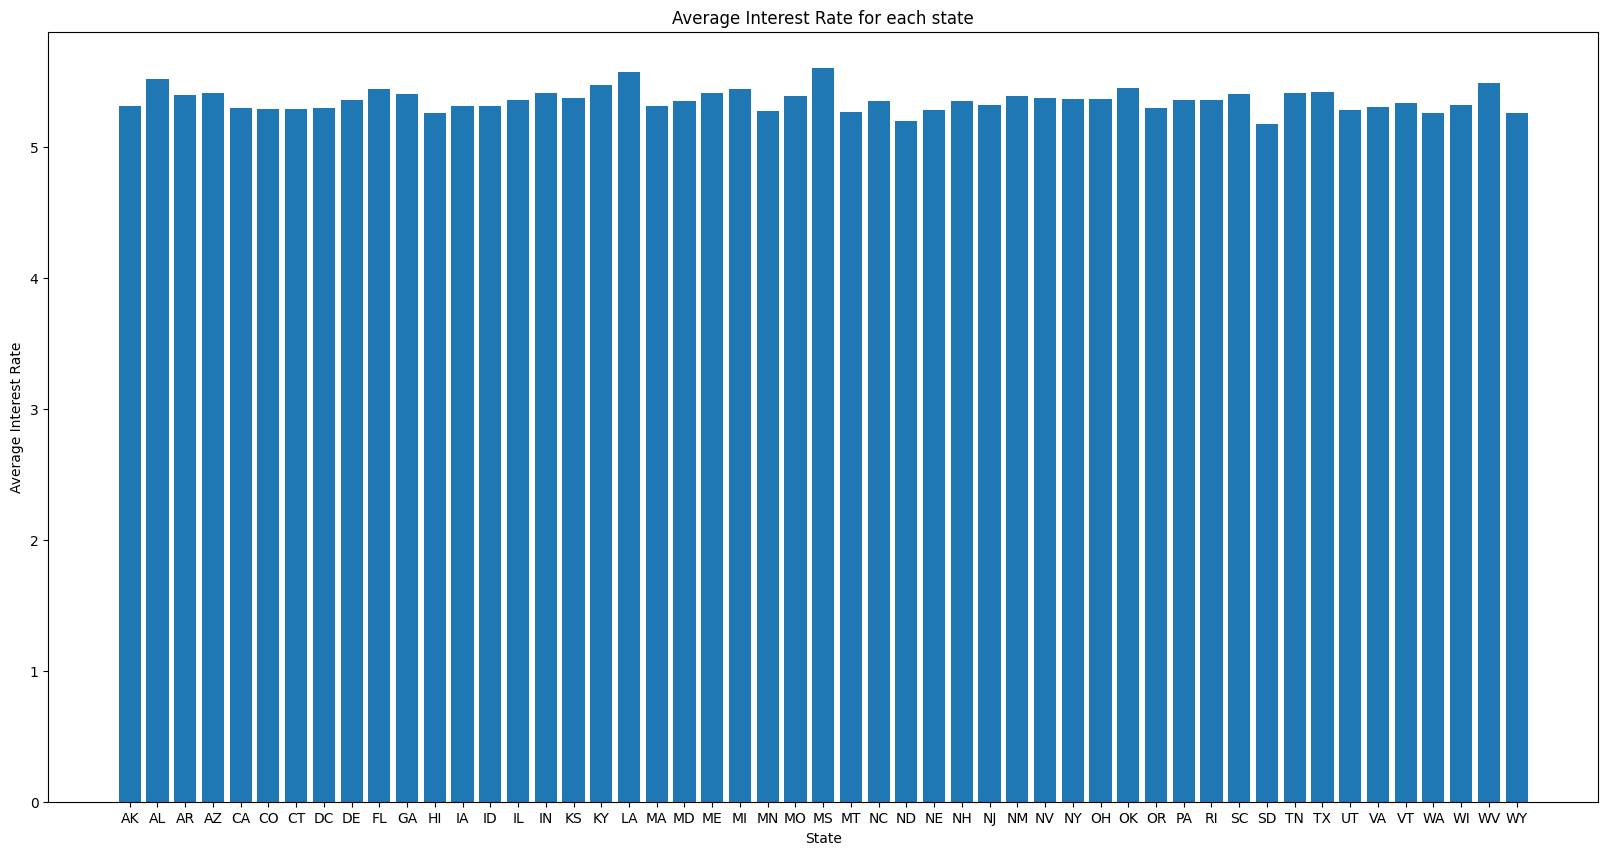

In [47]:
# plot of AVE_INTRATE for each state
plt.figure(figsize=(20,10))
plt.title('Average Interest Rate for each state')
plt.xlabel('State')
plt.ylabel('Average Interest Rate')
plt.bar(state_data['GEOID'].unique(), state_data.groupby('GEOID')['AVE_INTRATE'].sum()/576)
plt.show()

In [48]:
# post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(state_data['AVE_INTRATE'], state_data['GEOID'])
result = mc.tukeyhsd()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [49]:
# count number of rejecs = false
reject = np.where(result.reject == False)[0]
print("Number of not rejects:", len(reject))
print("Number of rejects:", len(result.reject) - len(reject))

Number of not rejects: 1271
Number of rejects: 4
